In [1]:
#1. Install and Import Dependencies
#install pytorch
#install git

In [50]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch #import pytorch
from matplotlib import pyplot as plt #for rendering
import numpy as np #array transformation library
import cv2

C:\Users\Adib Razak\anaconda3\envs\YOLO recyclable 1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#2. Load Model

In [6]:
#loading pre-trained ultralytics model from torch hub (tensorflow hub equivalent)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in C:\Users\Adib Razak/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-20 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
#architecture
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [8]:
#3. Make Detections with Images

In [9]:
#img = 'https://i.etsystatic.com/9171787/r/il/d5c64a/2856219187/il_794xN.2856219187_ksr2.jpg'
img = os.path.join('data', 'images', 'bottle.0.jpg')

In [10]:
results = model(img)
results.print()

image 1/1: 640x640 1 bottle
Speed: 48.3ms pre-process, 3693.5ms inference, 94.6ms NMS per image at shape (1, 3, 640, 640)


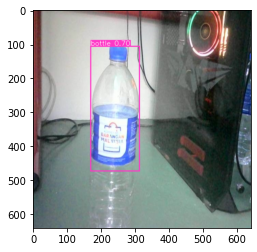

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.render()

[array([[[138,  74,  64],
         [139,  75,  65],
         [135,  71,  62],
         ...,
         [ 18,  38,  37],
         [ 18,  36,  36],
         [ 19,  37,  37]],
 
        [[139,  75,  66],
         [139,  75,  66],
         [136,  72,  63],
         ...,
         [ 16,  36,  35],
         [ 17,  35,  35],
         [ 18,  36,  36]],
 
        [[139,  74,  68],
         [140,  75,  69],
         [136,  71,  65],
         ...,
         [ 14,  34,  33],
         [ 15,  33,  33],
         [ 18,  34,  34]],
 
        ...,
 
        [[ 86,  97, 103],
         [ 87,  98, 104],
         [ 88,  99, 105],
         ...,
         [125, 156, 150],
         [126, 157, 151],
         [126, 157, 151]],
 
        [[ 86,  97, 103],
         [ 87,  98, 104],
         [ 89, 100, 106],
         ...,
         [125, 156, 150],
         [126, 157, 151],
         [126, 157, 151]],
 
        [[ 86,  97, 103],
         [ 87,  98, 104],
         [ 89, 100, 106],
         ...,
         [125, 156, 150],
  

In [13]:
#4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0) # '0' for camera detection, path to video file for detection in video
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
#5. Train from scratch

In [4]:
import uuid   # Unique identifier
import os
import time

In [5]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['bottle', 'powder']
number_imgs = 20

In [22]:
#create dataset using cameras
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5) #transition duration between labels
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [3]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\bottle.1857d3cc-f5d8-11ec-8f97-2cf05d0839c5.jpg


In [4]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\bottle.1a2123f0-f5d8-11ec-b7a8-2cf05d0839c5.jpg
data\images\bottle.1a2123f1-f5d8-11ec-991c-2cf05d0839c5.jpg
data\images\bottle.1a2123f2-f5d8-11ec-82a4-2cf05d0839c5.jpg
data\images\bottle.1a2123f3-f5d8-11ec-85a1-2cf05d0839c5.jpg
data\images\bottle.1a2123f4-f5d8-11ec-8961-2cf05d0839c5.jpg
data\images\bottle.1a2123f5-f5d8-11ec-9c81-2cf05d0839c5.jpg
data\images\bottle.1a2123f6-f5d8-11ec-997c-2cf05d0839c5.jpg
data\images\bottle.1a2123f7-f5d8-11ec-8eee-2cf05d0839c5.jpg
data\images\bottle.1a2123f8-f5d8-11ec-91e4-2cf05d0839c5.jpg
data\images\bottle.1a2123f9-f5d8-11ec-aa43-2cf05d0839c5.jpg
data\images\bottle.1a214aec-f5d8-11ec-8e38-2cf05d0839c5.jpg
data\images\bottle.1a214aed-f5d8-11ec-9656-2cf05d0839c5.jpg
data\images\bottle.1a214aee-f5d8-11ec-95b7-2cf05d0839c5.jpg
data\images\bottle.1a214aef-f5d8-11ec-9588-2cf05d0839c5.jpg
data\images\bottle.1a214af0-f5d8-11ec-a525-2cf05d0839c5.jpg
data\images\bottle.1a214af1-f5d8-11ec-b533-2cf05d0839c5.jpg
data\images\bottle.1a214af2-f5d8-11ec-8f

In [5]:
!git clone https://github.com/tzutalin/labelImg # graphical image annotation tool

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [7]:
!cd yolov5 && python train.py --img 640 --batch 10 --epochs 10 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   1156a32..0537e8d  master            -> origin/master
   85c1c01..fba9ebf  classifier        -> origin/classifier
 * [new branch]      dependabot/pip/protobuf-lt-4.21.3 -> origin/dependabot/pip/protobuf-lt-4.21.3
 * [new branch]      pip               -> origin/pip
   91ef588..1bda6bf  ultralytics/HUB   -> origin/ultralytics/HUB
 * [new branch]      update/textlogger -> or

In [5]:
#6. Load Custom Model

In [6]:
import torch #import pytorch
from matplotlib import pyplot as plt #for rendering
import numpy as np #array transformation library
import cv2

In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Adib Razak/.cache\torch\hub\master.zip
YOLOv5  2022-6-20 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [20]:
img = os.path.join('data', 'images', 'bottle.0.jpg')

In [21]:
results = model(img)

In [22]:
results.print()

image 1/1: 640x640 (no detections)
Speed: 8.0ms pre-process, 153.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


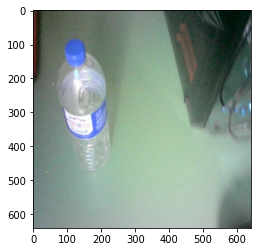

In [23]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame) #pass frame to models to get results
    
    cv2.imshow('YOLO', np.squeeze(results.render())) #update results to cv2
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()